# Multivariate Linear Regression + Checking Linear Assumptions

### Importing Modules and Opening CSV

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('dataframe_for_model.csv')
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo
...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove


In [3]:
cities_df = pd.read_csv('cities_coord.csv')
cities_df

,City,Latitude,Longitude
0,Acampo,38.174640,-121.278559
1,Aguanga,33.442809,-116.865024
2,Alameda,37.609029,-121.899142
3,Alamo,37.850203,-122.032184
4,Albany,37.886870,-122.297747
...,...,...,...
397,Yolo,38.718454,-121.905900
398,Yorba Linda,33.890110,-117.824971
399,Yountville,38.402201,-122.359506
400,Yuba City,39.140448,-121.616911


In [4]:
cities_df = cities_df.set_index('City')

In [5]:
df[['Lat', 'Long']] = cities_df.loc[df["City"]].values # converting categorical variable to numerical coordiantes
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco,37.779026,-122.419906
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose,37.336166,-121.890591
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park,33.814754,-117.820623
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles,34.053691,-118.242766
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove,38.408799,-121.371618


In [6]:
df = df.drop(columns=["Unnamed: 0", "City"])
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Lat,Long
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,34.053691,-118.242766
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,34.021122,-118.396466
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,37.233325,-121.684635
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,37.779026,-122.419906
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,37.336166,-121.890591
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,33.814754,-117.820623
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,34.053691,-118.242766
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,38.408799,-121.371618


In [7]:
# moving target variable to end

df = df[[col for col in df.columns if col != "Listed Price"] + ["Listed Price"]]
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,34.053691,-118.242766,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,34.021122,-118.396466,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,37.233325,-121.684635,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,37.779026,-122.419906,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,37.336166,-121.890591,1224888.0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,33.814754,-117.820623,2569000.0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,34.053691,-118.242766,2295000.0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,38.408799,-121.371618,499888.0


### Defining X and Y

In [8]:
X = df.drop(['Listed Price'], axis=1) 
y = df["Listed Price"].values # target

In [9]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Checking Linear Asumptions

#### Check 3 of the most crucial assumptions: Linearity, Normality of Error Terms, and Multicollinearity. 

#### Analyzing linear assumptions lets us know how useful a linear model can be to model our dependent variable. If many assumptions are not met, then we know that the model will not be useful and that accuracy will be low.

### 1. We test for the first condition by actually fitting a multi-variate linear regression model and testing for accuracy, which is one of the models we are employing. 

## Assumption 1: Creating a Linear Model

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # linear model


LinearRegression()

In [11]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
print(y_pred)

[1037315.16120537 2383599.22943654  295386.28820364 ...  -21216.7708835
 1216016.27939709 2869320.92660592]


#### Test Scores & Accuracy

In [12]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.5832277709489465
Testing MSE error is: 1130012010107.439


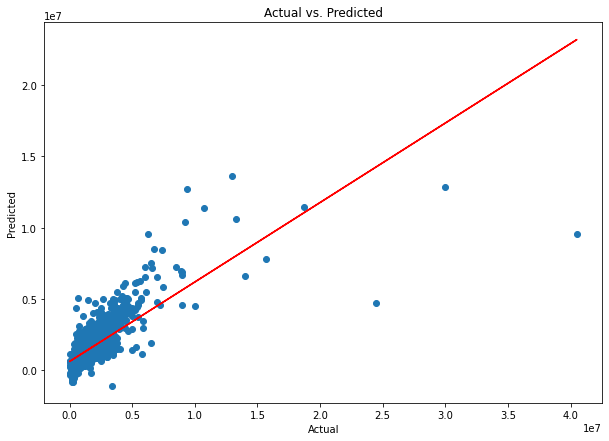

In [13]:
# plot of actual vs predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

The plot above depicts the relationship between our test set and their predicted values. Based on the linear regression line, the general trend of data, and r^2 score of ~58%, we can say that our linear model is decent in predicting the listed prices of California houses. The regression score, which is based on 10 variables, gives us an accuracy of approximately 58%. This score is _OK_, but the scatter also indicates some variability. We can try to increase this accuracy score with additional regression techniques.

In [14]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": abs(y_test - y_pred)})

pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,915000.0,1.037315e+06,122315.161205
1,1938000.0,2.383599e+06,445599.229437
2,750000.0,2.953863e+05,454613.711796
3,139900.0,3.875663e+04,101143.374519
4,1899000.0,2.198691e+06,299691.438396
5,3888000.0,4.353186e+06,465186.175225
6,1250000.0,9.409407e+05,309059.348916
7,1111000.0,7.229278e+05,388072.226989
8,869500.0,1.081211e+06,211710.846863
9,2348000.0,1.966964e+06,381035.522972


The table above shows us our actual value (`y_test` values) against their predictions based on the model (`y_pred`). We also look at their differences, which seems to vary quite a bit. The difference is large, but this is somewhat expected due to house listing prices being high to begin with.

#### Testing Our Model on Real Data

In [15]:
test_random = df.drop("Listed Price",axis=1).iloc[0].tolist()
test_random

[3.0, 2.0, 872.0, 3.0, 2.0, 2.0, 505000.0, 6253.0, 34.0536909, -118.242766]

In [16]:
test_result = lr.predict([test_random])

In [17]:
nums = list(range(0,2499)) # one data point for each test set listed house price

In [18]:
test_result

array([150688.16333066])

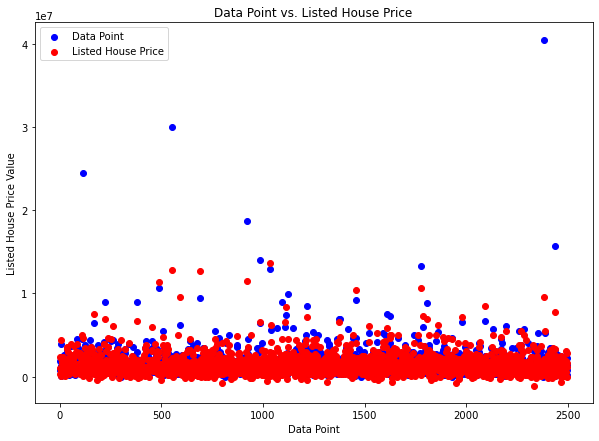

In [19]:
plt.figure(figsize=(10,7))

plt.scatter(nums,pred_y_df["Actual Value"], color="blue")
plt.scatter(nums,pred_y_df["Predicted Value"], color="red")

plt.xlabel("Data Point")
plt.ylabel("Listed House Price Value")
plt.title("Data Point vs. Listed House Price")
plt.legend(['Data Point', 'Listed House Price'])

plt.show()

#### Comparing Prediction Price to Actual Price

In [20]:
df["Listed Price"][0] - test_result

array([374311.83666934])

By calculating the difference between our predicted price and actual price, we can see how accurate our model is. Here, we see that the difference is roughly $374K.

## Assumption 2: Normality of Error Terms

### Functions cited from: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [21]:
# function to calculate residuals

def calculate_residuals(model, features, label):
    
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

p-value from the test - below 0.05 indicates non-normal: 0.0
Residuals are not normally distributed


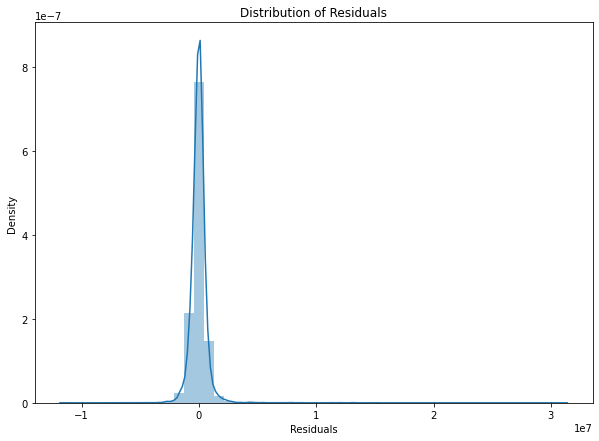


Assumption not satisfied!



In [22]:
# function that checks residuals and looks at distribution of errors

import seaborn as sns
from statsmodels.stats.diagnostic import normal_ad

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
 
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 indicates non-normal:', p_value) # very low p-value
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(10, 7))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied!')
    else:
        print('Assumption not satisfied!')
        print()
        
normal_errors_assumption(lr, X, y)

## Multicollinearity Check

### Functions cited from: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

If there are existing correlations within the predictor variables, we cannot say (without bias) that the target variable is being predicted accurately. Therefore, we can run a multicollinearity check on our numerical variables using the `VIF` library.

In [23]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Bedrooms,25.141863
1,Bathrooms,18.677506
2,Total interior livable area,16.967281
3,Elementary School Score,15.795502
4,Middle School Score,17.641309
5,High School Score,22.022347
6,Tax assessed value,113.698171
7,Annual tax amount,118.724789
8,Lat,1044.244869
9,Long,1031.373588


Looking at all the variables, we can see that many variables are highly correlated with each other. This can produce a major problem for our multiple polynomial model, as we may not be able to recognize which variables are responsible for the output variable.

However, we can combine the correlated variables and drop the others to predict "Listed Price" in future models. This not only produces a cleaner dataset, but can perhaps provide us with a more reliable model.

In [24]:
# new dataset with combined variables

df2 = df.copy()
df2['Bedrooms_Bathrooms'] = df.apply(lambda x: x['Bedrooms'] - x['Bathrooms'],axis=1)

df2['School_Score'] = df.apply(lambda x: (x['Elementary School Score'] + x['Middle School Score'] +
                                                                          x['High School Score'])/3,axis=1)

df2['Tax_value'] = df.apply(lambda x: x['Tax assessed value'] - x['Annual tax amount'],axis=1)


X = df2.drop(['Listed Price','Bedrooms','Bathrooms', 'Elementary School Score', 'Middle School Score',
             'High School Score', 'Tax assessed value', 'Annual tax amount', "Lat", "Long"],axis=1)
calc_vif(X)

,variables,VIF
0,Total interior livable area,6.517500
1,Bedrooms_Bathrooms,1.977335
2,School_Score,5.817968
3,Tax_value,2.846175


Using these refined variables, we can test to see whether or not the new dataset has a positive impact on the linear regression model and accuracy score.

In [25]:
df2 = df2[['Total interior livable area', 'Bedrooms_Bathrooms', 'School_Score', 'Tax_value',"Lat", "Long",
           "Listed Price"]]
df2

,Total interior livable area,Bedrooms_Bathrooms,School_Score,Tax_value,Lat,Long,Listed Price
0,872.0,1.0,2.333333,498747.0,34.053691,-118.242766,525000.0
1,2612.0,2.0,8.000000,1754213.0,34.021122,-118.396466,1895000.0
2,1579.0,2.0,6.000000,70443.0,37.233325,-121.684635,1428000.0
3,3351.0,3.0,7.333333,2055701.0,37.779026,-122.419906,2250000.0
4,2100.0,1.0,6.666667,1814479.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...
12486,2219.0,1.0,7.666667,888056.0,37.336166,-121.890591,1224888.0
12487,4680.0,-1.0,6.333333,2334867.0,33.814754,-117.820623,2569000.0
12488,1860.0,1.0,5.666667,570789.0,34.053691,-118.242766,2295000.0
12489,2125.0,0.0,7.333333,477069.0,38.408799,-121.371618,499888.0


In [26]:
X = df2.drop(['Listed Price'], axis=1)
y = df2["Listed Price"].values

We can now use this edited dataframe to rerun our linear regression and see how that changes our scores and accuracy.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5) # new test size 

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train) # rerun regression

LinearRegression()

In [29]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
#print(y_pred)

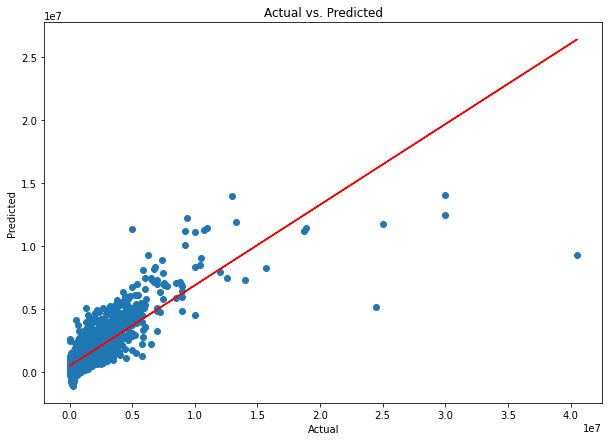

In [30]:
# plot actual vs. predicted

plt.figure(figsize=(10,7))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

In [31]:
print(r2_score(y_test, y_pred)) # calculating NEW r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6383750021459081
Testing MSE error is: 853101729719.8976


In [32]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Residual Difference": abs(y_test - y_pred)})

pred_y_df[0:10]

,Actual Value,Predicted Value,Residual Difference
0,915000.0,1.018500e+06,103499.916798
1,1938000.0,2.506262e+06,568262.237815
2,750000.0,4.010147e+05,348985.294996
3,139900.0,-1.554112e+05,295311.180079
4,1899000.0,2.380688e+06,481688.304955
5,3888000.0,4.407490e+06,519490.366235
6,1250000.0,8.447486e+05,405251.387762
7,1111000.0,5.774056e+05,533594.365266
8,869500.0,1.107191e+06,237690.596057
9,2348000.0,2.161615e+06,186384.734618


In [33]:
nums = list(range(0,4997)) # one data point for each listed house price
#nums

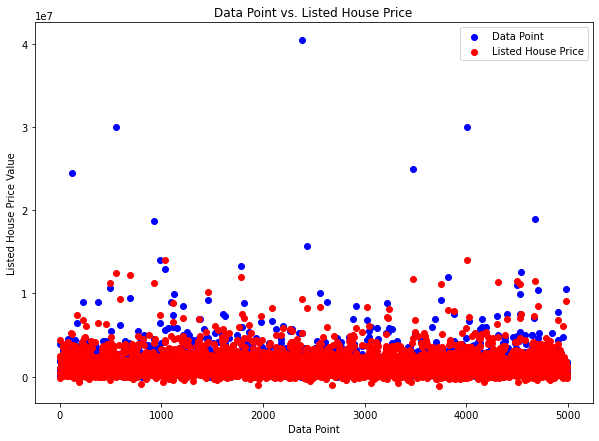

In [34]:
# new scatterplot

plt.figure(figsize=(10,7))

plt.scatter(nums,pred_y_df["Actual Value"], color="blue")
plt.scatter(nums,pred_y_df["Predicted Value"], color="red")

plt.xlabel("Data Point")
plt.ylabel("Listed House Price Value")
plt.title("Data Point vs. Listed House Price")
plt.legend(['Data Point', 'Listed House Price'])

plt.show()

With the plot above, we can see that that a linear regression model may not be enough to capture the model's trend. However it is notable that the R^2 and MSE increased and decreased, respectively. The changes are not major, so we have to attempt other models.

#### Testing Model on New Data Set - Testing Effects of Reducing Multicollinearity

In [35]:
test_random = df2.drop("Listed Price",axis=1).iloc[0].tolist() # testing with first row of actual dataset
test_random

[872.0, 1.0, 2.3333333333333335, 498747.0, 34.0536909, -118.242766]

In [36]:
test_result = lr.predict([test_random])
test_result

array([280298.77326927])

In [37]:
df["Listed Price"][0] - test_result

array([244701.22673073])

Now we see that the residual difference in pricing for one data point is a lot less. Our original model has a difference of 300K, whereas this new model with the updated dataset has a lower difference of 244K. So, we know that multicollinearity does play a big role in the accuracy of our model predictions.

# L1 & L2 Regression (Lasso and Ridge)

As seen in our multicollinearity check above, we can deduce that the features with a high VIF value likely have very high coefficients. This implies that our dependent variable (Listed Price) would be significantly overpowered by those features, which can lead to overfitting. We can employ L1 and L2 Regression to reduce model complexity and avoid overfitting. 

## Simple Ridge and Lasso

In [38]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [39]:
# moving Listed Price variable to the end

df2 = df[ [ col for col in df.columns if col != 'Listed Price' ] + ['Listed Price']]

In [40]:
X = df2.drop("Listed Price", axis=1)
y = df2["Listed Price"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11) #new test size

In [42]:
reg = LinearRegression().fit(X_train, y_train)

In [43]:
reg.score(X_test, y_test) # REGRESSION SCORE FOR TEST DATA!!

0.6371251171724626

Looking at the score of the test set, we can see that it isn't too low. For data that the model has never seen before, it is fitting the data with ~63% accuracy (with a new test size). We can test this with the training data to see if there was any significant overfitting.

In [44]:
reg.score(X_train, y_train)

0.688669466095837

Based on the training score, we can see that the accuracy score went up around 5%. This isn't bad, but we can perhaps employ L1 and L2 to see if we adjust and balance for any potential overfitting.

In [45]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=10000, tol=0.01)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=10000, tol=0.01)

In [46]:
print(lasso_reg.score(X_train, y_train))
print(lasso_reg.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!

0.6886694483761305
0.6371260663248648


In [47]:
y_pred = lasso_reg.predict(X_test) # prediction scores for test set
print(y_pred)

[1898596.41106045 1269053.62691972 1463841.50445456 ...  924798.22323446
  848804.13482629 1214265.83624752]


Text(0.5, 1.0, 'Actual vs. Predicted')

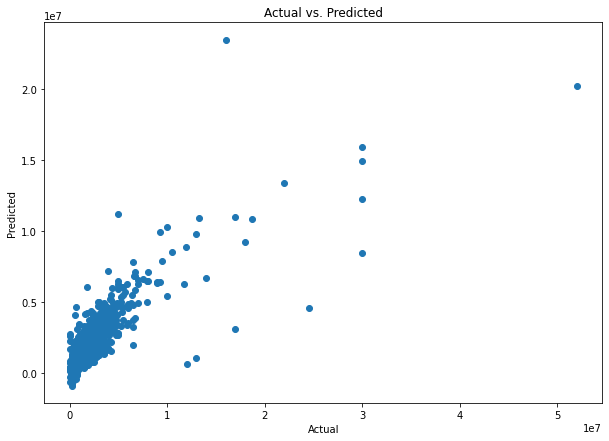

In [48]:
# lasso plot - actual vs predicted

plt.figure(figsize=(10,7))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


In [49]:
ridge_reg = Ridge(alpha=50, max_iter=10000, tol=0.01)

ridge_reg.fit(X_train, y_train) # ridge model

Ridge(alpha=50, max_iter=10000, tol=0.01)

In [50]:
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.6886526128381768
0.637138720642793


In [51]:
y_pred = ridge_reg.predict(X_test) # prediction scores for ridge
print(y_pred)

[1899236.84423683 1274308.30017363 1462448.68748004 ...  923056.48474152
  847512.61123347 1208839.12078266]


Text(0.5, 1.0, 'Actual vs. Predicted')

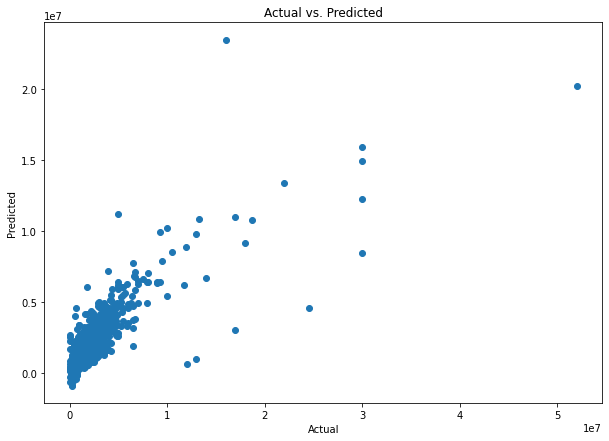

In [52]:
plt.figure(figsize=(10,7))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


## Ridge and Lasso - An Extension

### This extension is cited from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html. We follow their code and analysis to see how cross-validation and tuning the alpha parameter changes our model scores.

### Ridge

Generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [53]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Each alpha value is associated with a vector of ridge regression coefficients, which is stored in a matrix coefs. We next standardize the variables so that they are on the same scale.

In [54]:
# standardize variables

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
     
np.shape(coefs)

(100, 10)

We expect the coefficient estimates to be much smaller (in terms of  L2  regularization) when a large value of alpha is used, as compared to when a small value of alpha is used. Here's the corresponding plot:

Text(0, 0.5, 'weights')

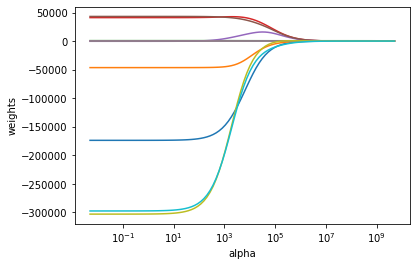

In [55]:
# plot alphas against weights

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [56]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Trying Model with 2 arbitrary alpha values 

In [57]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Bedrooms                      -161292.048908
Bathrooms                      -30923.457765
Total interior livable area       771.830832
Elementary School Score         41493.869569
Middle School Score              6333.740778
High School Score               39586.626779
Tax assessed value                 -0.308437
Annual tax amount                  73.952891
Lat                           -305848.051711
Long                          -301645.001683
dtype: float64
1031289579808.9991


In [58]:
print(ridge2.score(X_train, y_train))
print(ridge2.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.6591503469596203
0.7083998509132732


In [59]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Bedrooms                      -161444.419471
Bathrooms                      -30917.898140
Total interior livable area       772.010249
Elementary School Score         41482.055612
Middle School Score              6302.011760
High School Score               39591.604364
Tax assessed value                 -0.308281
Annual tax amount                  73.929664
Lat                           -306656.340980
Long                          -302399.624837
dtype: float64
1031288898265.9904


In [60]:
print(ridge2.score(X_train, y_train))
print(ridge2.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.659150429088091
0.708400043621555


It would be better to use cross-validation to choose the tuning parameter alpha instead of choosing arbitrary alpha values. We can do this using the cross-validated ridge regression function, RidgeCV().

In [61]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_ # best validated alpha

16.372745814388658

In [62]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

1031294241441.7521

#### Best Test Data Score!!!

In [63]:
print(ridge4.score(X_train, y_train))
print(ridge4.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA!!!

0.6591490740786559
0.7083985328229596


In [64]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Bedrooms                      -173272.943980
Bathrooms                      -46444.717638
Total interior livable area       793.230142
Elementary School Score         41099.221127
Middle School Score              -290.802235
High School Score               43093.091979
Tax assessed value                 -0.374336
Annual tax amount                  81.803164
Lat                           -300311.077903
Long                          -294964.392419
dtype: float64

### Lasso

In [65]:
# we use the same methods as above to run our lasso model.

In [66]:
# graphing lasso alpha and weights

Text(0, 0.5, 'weights')

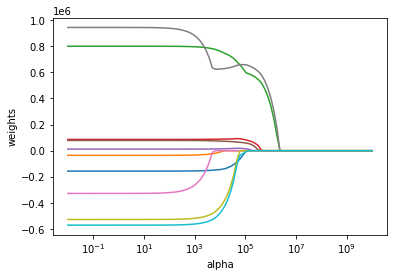

In [67]:
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [68]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1462810764291.3665

In [69]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test)) # REGRESSION SCORE FOR TEST DATA

0.5108469059161905
0.5863859721805471


#### The Lasso score has dropped. The Ridge Model has the best score.

However, lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are scattered. Here we see that 8 of the 10 coefficient estimates are exactly zero. However, the model accuracy is lower.

In [70]:
pd.Series(lasso.coef_, index=X.columns)

Bedrooms                       0.000000
Bathrooms                      0.000000
Total interior livable area    0.000000
Elementary School Score        0.000000
Middle School Score            0.000000
High School Score              0.000000
Tax assessed value             1.016674
Annual tax amount              0.000000
Lat                            0.000000
Long                          -0.000000
dtype: float64